In [2]:
import sys
sys.path.append('./DPT/')
sys.path.append('./background')
sys.path

['/Users/rakeshc/workspace/personal/personal_art',
 '/Users/rakeshc/.vscode/extensions/ms-toolsai.jupyter-2021.6.832593372/pythonFiles',
 '/Users/rakeshc/.vscode/extensions/ms-toolsai.jupyter-2021.6.832593372/pythonFiles/lib/python',
 '/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python36.zip',
 '/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python3.6',
 '/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python3.6/lib-dynload',
 '/Users/rakeshc/.pyenv/versions/3.6.9/lib/python3.6',
 '',
 '/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python3.6/site-packages',
 '/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python3.6/site-packages/IPython/extensions',
 '/Users/rakeshc/.ipython',
 './DPT/',
 './background']

In [23]:
import torch
from background import person_detection
import glob
import util.io as io

In [24]:
img_path = glob.glob(os.path.join('./DPT/input', "*"))[0]
img = io.read_image(img_path)

In [27]:

detector = person_detection.PersonDetection(img)

detector.detect()

Personal detection - initializing


AttributeError: 'PersonDetection' object has no attribute 'img'

In [11]:
predicted_masks_hybrid = segmentation_run(\
    './DPT/input', 
    './DPT/output_semseg',
    './DPT/weights/dpt_hybrid-ade20k-53898607.pt') 

initialize
device: cpu
start processing
  processing ./DPT/input/IMG_small.jpg (1/1)
/Users/rakeshc/.pyenv/versions/3.6.9/envs/torch_gdl/lib/python3.6/site-packages/torch/nn/functional.py:3455: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [12]:
predicted_masks_large, img = segmentation_run(\
    './DPT/input', 
    './DPT/output_semseg',
    './DPT/weights/dpt_large-ade20k-b12dca68.pt', model_type='dpt_large')

initialize
device: cpu
start processing
  processing ./DPT/input/IMG_small.jpg (1/1)


In [14]:
predicted_masks = np.minimum(predicted_masks_hybrid, predicted_masks_large)

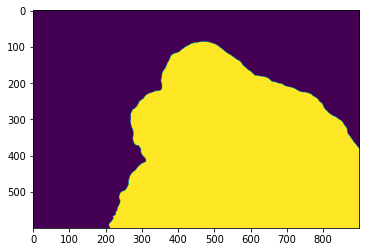

In [15]:
import numpy as np
from matplotlib import pyplot as plt

plt.imshow(predicted_masks)